In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(13)

from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10 # class size
input_unit_size = 28*28 # input vector size

In [3]:
x_train = x_train.reshape(x_train.shape[0], input_unit_size)
x_test  = x_test.reshape(x_test.shape[0], input_unit_size)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

# one-hot representation
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [4]:
model = Sequential()
model.add(Dense(128, input_dim=input_unit_size, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(num_classes, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

result = model.fit(x_train, y_train, epochs=20, batch_size=256, verbose=2,  validation_split=0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/20
3s - loss: 0.7662 - acc: 0.7903 - val_loss: 0.3381 - val_acc: 0.9099
Epoch 2/20
2s - loss: 0.3679 - acc: 0.8962 - val_loss: 0.2554 - val_acc: 0.9311
Epoch 3/20
2s - loss: 0.3003 - acc: 0.9144 - val_loss: 0.2185 - val_acc: 0.9429
Epoch 4/20
2s - loss: 0.2613 - acc: 0.9267 - val_loss: 0.1954 - val_acc: 0.9461
Epoch 5/20
3s - loss: 0.2324 - acc: 0.9340 - val_loss: 0.1742 - val_acc: 0.9539
Epoch 6/20
3s - loss: 0.2089 - acc: 0.9408 - val_loss: 0.1619 - val_acc: 0.9560
Epoch 7/20
2s - loss: 0.1909 - acc: 0.9461 - val_loss: 0.1496 - val_acc: 0.9584
Epoch 8/20
2s - loss: 0.1787 - acc: 0.9497 - val_loss: 0.1375 - val_acc: 0.9612
Epoch 9/20
3s - loss: 0.1662 - acc: 0.9526 - val_loss: 0.1308 - val_acc: 0.9649
Epoch 10/20
2s - loss: 0.1544 - acc: 0.9559 - val_loss: 0.1253 - val_acc: 0.9644
Epoch 11/20
2s - loss: 0.1462 - acc: 0.9571 - val_loss: 0.1169 - val_acc: 0.9676
Epoch 12/20
2s - loss: 0.1401 - acc: 0.9603 - val_loss: 0.1124 - val_

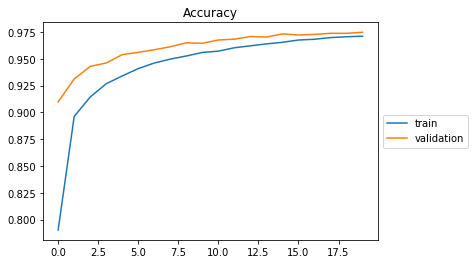

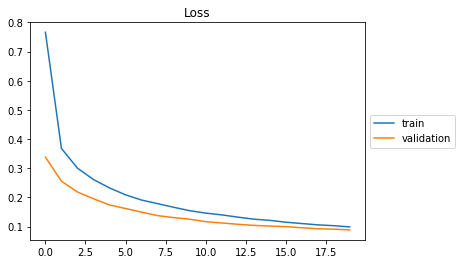

In [7]:
x = range(20)
plt.plot(x, result.history['acc'], label='train')
plt.plot(x, result.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, result.history['loss'], label='train')
plt.plot(x, result.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))